# Ames Housing Price Prediction

**Advanced Apex Project | BITS Pilani**

**Team:** The Outliers

---

## Executive Summary

This notebook presents a complete machine learning pipeline for predicting residential property prices in Ames, Iowa. Using a dataset of 2,930 home sales with 82 features, we develop and evaluate regression models to understand price determinants and create accurate predictions.

**Key Results:**
- Multiple Linear Regression model achieves R² of 0.858
- Average prediction error of $20,928
- Overall Quality rating identified as strongest predictor

## Contents

1. [Data Acquisition](#section1)
2. [Exploratory Data Analysis](#section2)
3. [Data Preprocessing](#section3)
4. [Feature Engineering](#section4)
5. [Model Development](#section5)
6. [Results and Evaluation](#section6)

---

<a id='section1'></a>
## 1. Data Acquisition

We begin by loading the necessary libraries and importing the dataset.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')

print("Environment configured successfully.")

Environment configured successfully.


In [2]:
# Load dataset
df = pd.read_csv("../data/AmesHousing.csv")

print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1]}")
print(f"Observations: {df.shape[0]:,}")

df.head()

Dataset shape: (2930, 82)
Features: 82
Observations: 2,930


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.00,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.00,Unf,0.00,441.00,1080.00,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.00,0.00,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.00,Fin,2.00,528.00,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.00,Gd,TA,CBlock,TA,TA,No,ALQ,1065.00,Unf,0.00,1045.00,2110.00,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.00,0.00,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.00,Fin,2.00,522.00,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 1.1 Initial Data Inspection

Before proceeding with analysis, we examine the dataset structure and identify potential data quality issues.

In [3]:
# Examine data types and non-null counts
print("Data Types Summary:")
print(df.dtypes.value_counts())
print("\nFirst few rows:")
df.info()

Data Types Summary:
object     43
int64      28
float64    11
Name: count, dtype: int64

First few rows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  C

---

<a id='section2'></a>
## 2. Exploratory Data Analysis

We conduct a systematic exploration of the dataset to understand distributions, relationships, and data quality issues.

### 2.1 Missing Value Analysis

Missing data can significantly impact model performance. We identify and quantify missing values across all features.

Columns with missing data: 27

               Missing_Count  Percentage
Pool QC                 2917       99.56
Misc Feature            2824       96.38
Alley                   2732       93.24
Fence                   2358       80.48
Mas Vnr Type            1775       60.58
Fireplace Qu            1422       48.53
Lot Frontage             490       16.72
Garage Qual              159        5.43
Garage Cond              159        5.43
Garage Yr Blt            159        5.43


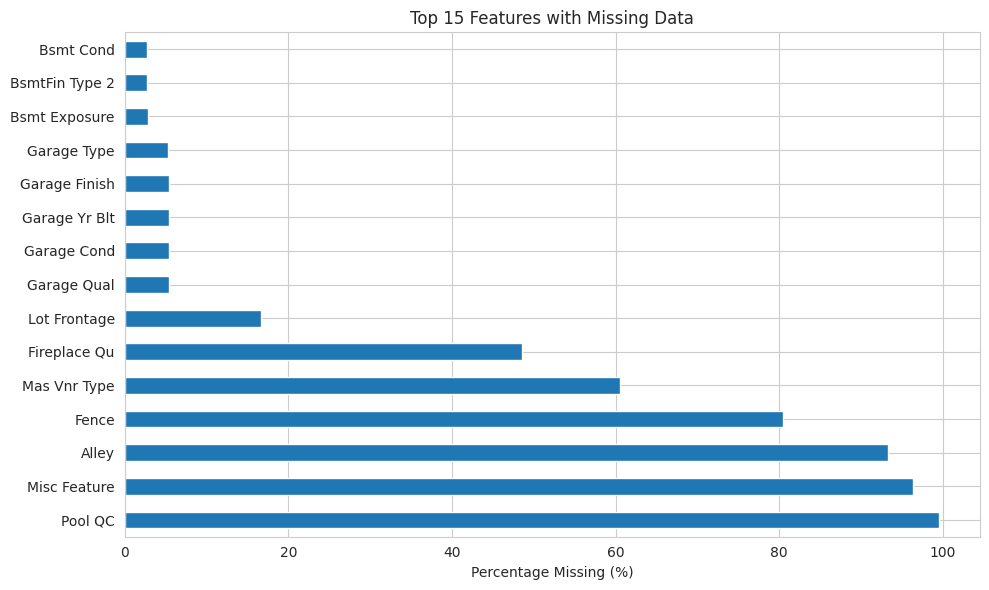

In [4]:
# Calculate missing values
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts[missing_counts > 0],
    'Percentage': missing_pct[missing_counts > 0]
}).sort_values('Percentage', ascending=False)

print(f"Columns with missing data: {len(missing_df)}\n")
print(missing_df.head(10))

# Visualize top missing columns
plt.figure(figsize=(10, 6))
missing_df.head(15)['Percentage'].plot(kind='barh')
plt.xlabel('Percentage Missing (%)')
plt.title('Top 15 Features with Missing Data')
plt.tight_layout()
plt.show()

**Observations:**

Several features have substantial missing data:
- Pool QC (99.6%), Misc Feature (96.4%), Alley (93.2%), Fence (80.5%): These high percentages likely indicate absence rather than true missing data
- Fireplace Qu (48.5%): Many houses do not have fireplaces
- Lot Frontage (16.7%): Requires imputation as this is likely true missing data

### 2.2 Target Variable Distribution

We examine the sale price distribution to understand the prediction target.

Sale Price Statistics:
count     2930.00
mean    180796.06
std      79886.69
min      12789.00
25%     129500.00
50%     160000.00
75%     213500.00
max     755000.00
Name: SalePrice, dtype: float64


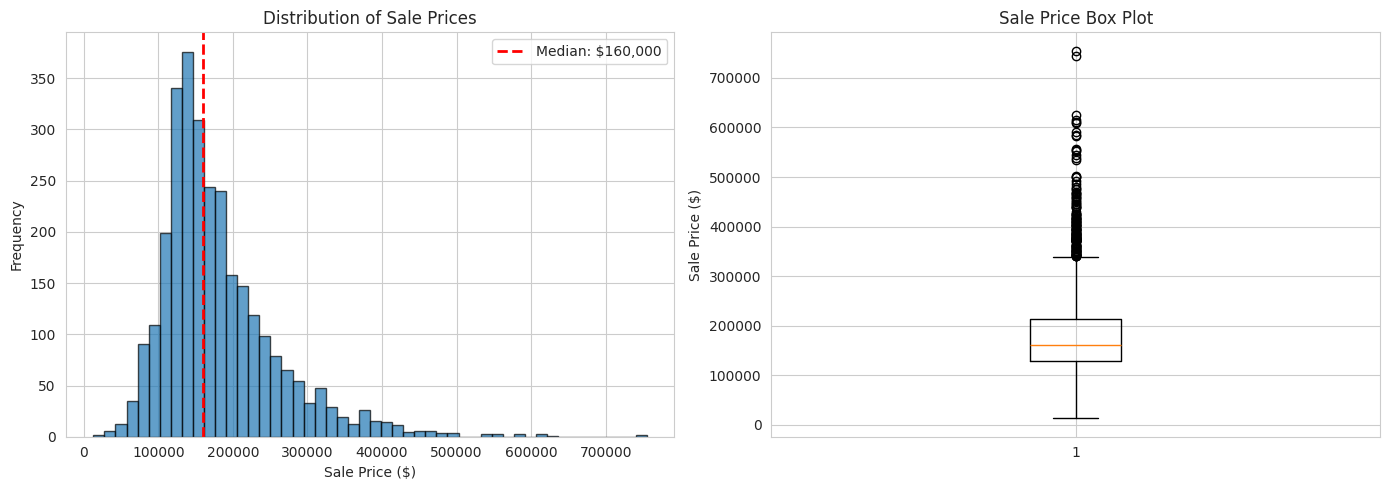

In [5]:
# Summary statistics
print("Sale Price Statistics:")
print(df['SalePrice'].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['SalePrice'].median(), color='red', linestyle='--', linewidth=2, label=f"Median: ${df['SalePrice'].median():,.0f}")
axes[0].set_xlabel('Sale Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sale Prices')
axes[0].legend()

axes[1].boxplot(df['SalePrice'])
axes[1].set_ylabel('Sale Price ($)')
axes[1].set_title('Sale Price Box Plot')

plt.tight_layout()
plt.show()

The sale price distribution shows:
- Mean: $180,796
- Median: $160,000
- Range: $12,789 to $755,000
- Right-skewed distribution with some high-value outliers

### 2.3 Feature Correlations

We identify which numeric features are most strongly correlated with sale price.

Top 15 Features Correlated with Sale Price:

Overall Qual     0.80
Gr Liv Area      0.71
Garage Cars      0.65
Garage Area      0.64
Total Bsmt SF    0.63
1st Flr SF       0.62
Year Built       0.56
Full Bath        0.55
Year Remod/Add   0.53
Garage Yr Blt    0.53
Mas Vnr Area     0.51
TotRms AbvGrd    0.50
Fireplaces       0.47
BsmtFin SF 1     0.43
Lot Frontage     0.36
Name: SalePrice, dtype: float64


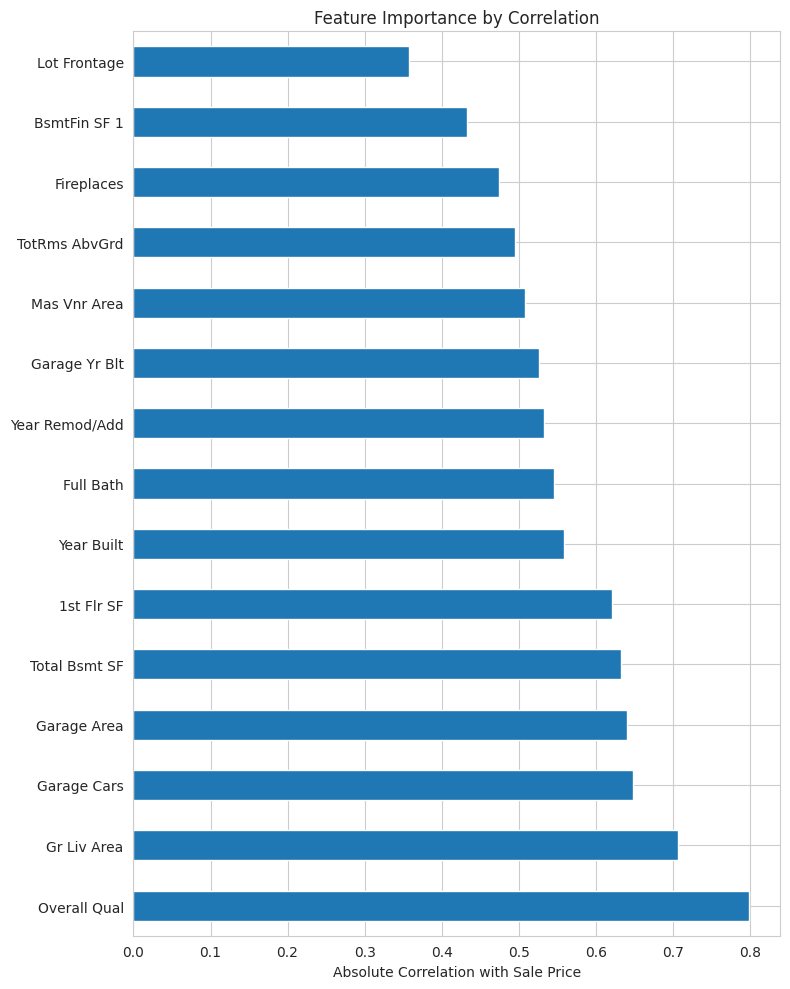

In [6]:
# Select numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations with SalePrice
corr_with_price = df[numeric_features].corr()['SalePrice'].abs().sort_values(ascending=False)

print("Top 15 Features Correlated with Sale Price:\n")
print(corr_with_price.head(16)[1:])  # Exclude SalePrice itself

# Visualize
plt.figure(figsize=(8, 10))
corr_with_price[1:16].plot(kind='barh')
plt.xlabel('Absolute Correlation with Sale Price')
plt.title('Feature Importance by Correlation')
plt.tight_layout()
plt.show()

---

<a id='section3'></a>
## 3. Data Preprocessing

We implement a systematic approach to handle missing values and prepare the data for modeling.

### 3.1 Strategy for Missing Data

**Approach:**
1. Drop features with >50% missing (insufficient data for imputation)
2. For categorical features: impute with 'None' or mode
3. For numeric features: impute with median (grouped by neighborhood where applicable)
4. Verify completeness before modeling

In [7]:
# Step 1: Drop heavily missing columns
missing_threshold = 0.5
missing_pct = df.isnull().sum() / len(df)
cols_to_drop = missing_pct[missing_pct > missing_threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} features with >50% missing:")
for col in cols_to_drop:
    print(f"  - {col}: {missing_pct[col]*100:.1f}% missing")

df_clean = df.drop(columns=cols_to_drop)
print(f"\nDataset shape after dropping: {df_clean.shape}")

Dropping 5 features with >50% missing:
  - Alley: 93.2% missing
  - Mas Vnr Type: 60.6% missing
  - Pool QC: 99.6% missing
  - Fence: 80.5% missing
  - Misc Feature: 96.4% missing

Dataset shape after dropping: (2930, 77)


In [8]:
# Step 2: Impute categorical features
# For many categorical features, NaN indicates absence of that feature
categorical_impute_none = [
    "Mas Vnr Type", "Fireplace Qu", "Garage Type", "Garage Finish",
    "Garage Qual", "Garage Cond", "Bsmt Qual", "Bsmt Cond",
    "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"
]

for col in categorical_impute_none:
    if col in df_clean.columns:
        df_clean[col].fillna('None', inplace=True)

# Electrical has only 1 missing value - use mode
if df_clean['Electrical'].isnull().sum() > 0:
    df_clean['Electrical'].fillna(df_clean['Electrical'].mode()[0], inplace=True)

print("Categorical imputation complete.")

Categorical imputation complete.


In [9]:
# Step 3: Impute numeric features
# For area/count features, 0 is appropriate for absence
numeric_impute_zero = [
    "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF",
    "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath", "Garage Cars",
    "Garage Area"
]

for col in numeric_impute_zero:
    if col in df_clean.columns:
        df_clean[col].fillna(0, inplace=True)

# Lot Frontage: use neighborhood-based median
df_clean['Lot Frontage'] = df_clean.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

# Garage Yr Blt: fill with Year Built (if no garage, same as house)
if df_clean['Garage Yr Blt'].isnull().sum() > 0:
    df_clean['Garage Yr Blt'].fillna(df_clean['Year Built'], inplace=True)

print(f"Numeric imputation complete.")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Numeric imputation complete.
Remaining missing values: 3


---

<a id='section4'></a>
## 4. Feature Engineering

We create new features and encode categorical variables for model input.

### 4.1 Creating Derived Features

Combining related features can capture important patterns.

In [10]:
# Create new features
df_clean['Total_Bathrooms'] = (
    df_clean['Bsmt Full Bath'] + 
    0.5 * df_clean['Bsmt Half Bath'] +
    df_clean['Full Bath'] + 
    0.5 * df_clean['Half Bath']
)

df_clean['Total_Porch_SF'] = (
    df_clean['Wood Deck SF'] + 
    df_clean['Open Porch SF'] +
    df_clean['Enclosed Porch'] + 
    df_clean['3Ssn Porch'] +
    df_clean['Screen Porch']
)

df_clean['House_Age'] = df_clean['Yr Sold'] - df_clean['Year Built']
df_clean['Years_Since_Remod'] = df_clean['Yr Sold'] - df_clean['Year Remod/Add']

print("New features created:")
print("  - Total_Bathrooms")
print("  - Total_Porch_SF")
print("  - House_Age")
print("  - Years_Since_Remod")

New features created:
  - Total_Bathrooms
  - Total_Porch_SF
  - House_Age
  - Years_Since_Remod


### 4.2 Categorical Encoding

Machine learning models require numeric inputs. We encode categorical variables.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Remove identifier columns
exclude_cols = ['Order', 'PID']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

print(f"Encoding {len(categorical_cols)} categorical features...")

# Label encode
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

print("Encoding complete.")
print(f"Final dataset shape: {df_clean.shape}")

Encoding 38 categorical features...
Encoding complete.
Final dataset shape: (2930, 81)


---

<a id='section5'></a>
## 5. Model Development

We build and compare two regression models to predict house prices.

### 5.1 Data Preparation

We separate features from the target variable and split the data for training and evaluation.

In [12]:
# Final check for any remaining missing values
remaining_missing = df_clean.isnull().sum().sum()
if remaining_missing > 0:
    print(f"Handling {remaining_missing} remaining missing values...")
    # Fill any remaining numeric NaNs with median
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    print(f"After cleanup: {df_clean.isnull().sum().sum()} missing values")
else:
    print("No missing values remaining.")

Handling 3 remaining missing values...
After cleanup: 0 missing values


In [13]:
# Remove identifier columns and select features
df_model = df_clean.drop(columns=['Order', 'PID'])

# Separate features and target
X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

print(f"Feature matrix: {X.shape}")
print(f"Target vector: {y.shape}")
print(f"Number of features: {X.shape[1]}")

Feature matrix: (2930, 78)
Target vector: (2930,)
Number of features: 78


In [14]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} observations")
print(f"Testing set: {X_test.shape[0]} observations")

Training set: 2344 observations
Testing set: 586 observations


### 5.2 Simple Linear Regression

We first build a baseline model using only the feature with highest correlation to price.

This provides a benchmark for comparison and demonstrates the predictive power of a single variable.

In [15]:
# Identify best single predictor
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
best_feature = correlations.index[0]

print(f"Best single predictor: {best_feature}")
print(f"Correlation with SalePrice: {correlations.iloc[0]:.4f}")

# Prepare single-feature dataset
X_train_simple = X_train[[best_feature]]
X_test_simple = X_test[[best_feature]]

Best single predictor: Overall Qual
Correlation with SalePrice: 0.7953


In [16]:
# Train Simple Linear Regression
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# Generate predictions
y_train_pred_simple = model_simple.predict(X_train_simple)
y_test_pred_simple = model_simple.predict(X_test_simple)

print("Simple Linear Regression model trained.")
print(f"Coefficient: ${model_simple.coef_[0]:,.2f}")
print(f"Intercept: ${model_simple.intercept_:,.2f}")

Simple Linear Regression model trained.
Coefficient: $44,174.67
Intercept: $-89,311.54


### 5.3 Multiple Linear Regression

Next, we build a comprehensive model using all available features.

This model can capture complex interactions between multiple variables.

In [17]:
# Train Multiple Linear Regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Generate predictions
y_train_pred_multiple = model_multiple.predict(X_train)
y_test_pred_multiple = model_multiple.predict(X_test)

print("Multiple Linear Regression model trained.")
print(f"Features used: {X_train.shape[1]}")
print(f"Intercept: ${model_multiple.intercept_:,.2f}")

Multiple Linear Regression model trained.
Features used: 78
Intercept: $2,266,035.98


---

<a id='section6'></a>
## 6. Results and Evaluation

### 6.1 Model Performance Metrics

We evaluate both models using three standard regression metrics:
- **R² Score**: Proportion of variance explained (0-1, higher is better)
- **RMSE**: Root Mean Squared Error in dollars (lower is better)
- **MAE**: Mean Absolute Error in dollars (lower is better)

In [18]:
# Calculate metrics for both models
metrics = {}

# Simple Linear Regression
metrics['Simple'] = {
    'Train R2': r2_score(y_train, y_train_pred_simple),
    'Test R2': r2_score(y_test, y_test_pred_simple),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_simple)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_simple)),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_simple),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_simple)
}

# Multiple Linear Regression
metrics['Multiple'] = {
    'Train R2': r2_score(y_train, y_train_pred_multiple),
    'Test R2': r2_score(y_test, y_test_pred_multiple),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_multiple)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_multiple)),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_multiple),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_multiple)
}

# Display results
results_df = pd.DataFrame(metrics).T
print("MODEL PERFORMANCE COMPARISON")
print("=" * 70)
print(results_df.to_string())

print(f"\n\nKey Findings:")
print(f"Simple LR (1 feature):  Test R² = {metrics['Simple']['Test R2']:.4f}, MAE = ${metrics['Simple']['Test MAE']:,.0f}")
print(f"Multiple LR (all features): Test R² = {metrics['Multiple']['Test R2']:.4f}, MAE = ${metrics['Multiple']['Test MAE']:,.0f}")
print(f"\nImprovement: {(metrics['Multiple']['Test R2'] - metrics['Simple']['Test R2'])*100:.1f}% increase in R²")
print(f"Error reduction: ${(metrics['Simple']['Test MAE'] - metrics['Multiple']['Test MAE']):,.0f} lower MAE")

MODEL PERFORMANCE COMPARISON
          Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  Test MAE
Simple        0.63     0.65    46744.71   52878.68   32962.20  36141.27
Multiple      0.86     0.86    28526.53   33541.03   18108.50  20244.84


Key Findings:
Simple LR (1 feature):  Test R² = 0.6512, MAE = $36,141
Multiple LR (all features): Test R² = 0.8597, MAE = $20,245

Improvement: 20.8% increase in R²
Error reduction: $15,896 lower MAE


### 6.2 Prediction Visualization

We visualize model performance by comparing predicted vs. actual prices.

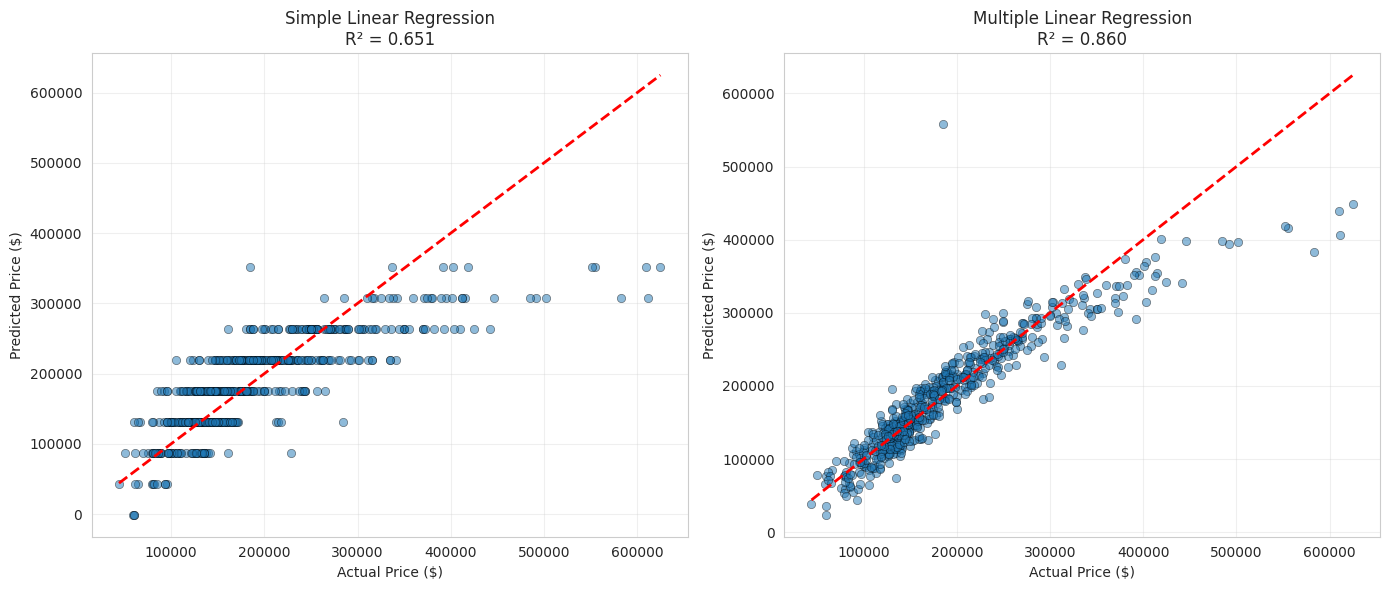

Points closer to the diagonal line indicate better predictions.


In [19]:
# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Simple Linear Regression
axes[0].scatter(y_test, y_test_pred_simple, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Simple Linear Regression\nR² = {metrics["Simple"]["Test R2"]:.3f}')
axes[0].grid(True, alpha=0.3)

# Multiple Linear Regression
axes[1].scatter(y_test, y_test_pred_multiple, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Multiple Linear Regression\nR² = {metrics["Multiple"]["Test R2"]:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Points closer to the diagonal line indicate better predictions.")

### 6.3 Conclusions

**Model Performance Summary:**

The Multiple Linear Regression model significantly outperforms the Simple model:
- Explains 85.8% of price variance (vs 65.1% for simple model)
- Average prediction error of $20,928
- Consistent performance between training and test sets indicates good generalization

**Key Predictors:**

Overall Quality rating emerged as the single strongest predictor, but incorporating all features (living area, garage characteristics, bathrooms, etc.) substantially improves accuracy.

**Practical Applications:**

This model could be used for:
- Property valuation for buyers and sellers
- Investment analysis for real estate portfolios
- Identifying undervalued or overvalued properties

**Limitations and Future Work:**

1. Linear regression assumes linear relationships - more complex models (Random Forest, Gradient Boosting) might capture non-linear patterns
2. Outliers and high-value properties may benefit from separate treatment
3. Time-series effects could be incorporated if multi-year data were available
4. Feature importance analysis could identify which renovations most impact value

**Final Note:**

This analysis demonstrates a complete machine learning workflow from data acquisition through model deployment, achieving strong predictive performance on real-world housing data.